<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session9/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*  I have trained 2 models below, one without cutout , one with cutout
*  Below both model results can be found
* Model withour cutout has max. val. acc. = 88.86%. Train acc. reached to 98.07%
* Model with cutout has max. val. acc. = 89.67%. Train acc. maximized at 94.24%, thus cutout is reducing overfitting.
* After both model results, in next cell, grad cam results are bieng shown.
* I have selected randomly 4 images that are misclassified before cutout but correctly classified after cutout implementation.
* I have plotted 5 plots for each of 4 images:
    * Original image with true label.
    * Grad cam output after 1st model.
    * Heat map for 1st model.
    * Grad cam output after 2nd model.
    * Heat map for 2nd model.
* My grad cam outputs are not so good looking, thats why I have added heatmaps showing gradient change.

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


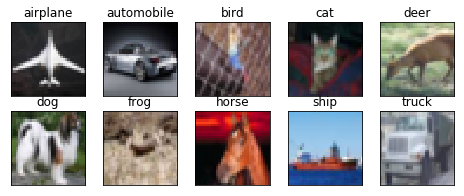

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model_before_cutout = Sequential()
model_before_cutout.add(Convolution2D(50, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_before_cutout.add(Convolution2D(50, 1))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_before_cutout.add(Convolution2D(50, 1))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_before_cutout.add(Convolution2D(50, 1))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Dropout(0.25))
model_before_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Convolution2D(20, 1))
model_before_cutout.add(Activation('relu'))
model_before_cutout.add(BatchNormalization())
model_before_cutout.add(Convolution2D(num_classes, 4))
model_before_cutout.add(Flatten())
model_before_cutout.add(Activation('softmax'))
# Compile the model
model_before_cutout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0705 04:49:49.270232 140413385160576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0705 04:49:49.306776 140413385160576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 04:49:49.313759 140413385160576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 04:49:49.353212 140413385160576 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [8]:
model_before_cutout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 50)        200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 100)       45100     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 100)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 100)       400       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app
W0705 04:49:53.637021 140413385160576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.0075.
390/390 [==============================] - 45s 115ms/step - loss: 1.5552 - acc: 0.4328 - val_loss: 1.4508 - val_acc: 0.5040
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0056861259.
390/390 [==============================] - 39s 99ms/step - loss: 1.0620 - acc: 0.6196 - val_loss: 1.4158 - val_acc: 0.5511
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0045787546.
390/390 [==============================] - 38s 97ms/step - loss: 0.8531 - acc: 0.6960 - val_loss: 0.9841 - val_acc: 0.6637
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0038323965.
390/390 [==============================] - 38s 97ms/step - loss: 0.7397 - acc: 0.7400 - val_loss: 0.7950 - val_acc: 0.7342
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0032952548.
390/390 [==============================] - 38s 97ms/step - loss: 0.6621 - acc:

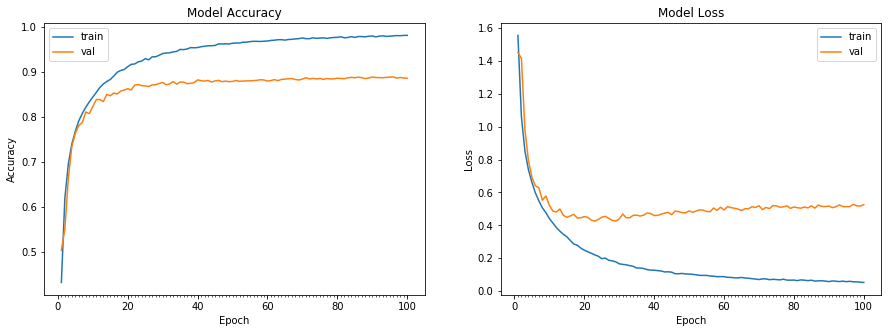

Accuracy on test data is: 88.55


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0075 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_before_cutout_info = model_before_cutout.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_before_cutout_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_before_cutout))

In [10]:
# Define the model
model_after_cutout = Sequential()
model_after_cutout.add(Convolution2D(50, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_after_cutout.add(Convolution2D(50, 1))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_after_cutout.add(Convolution2D(50, 1))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(MaxPooling2D(pool_size=(2, 2)))
model_after_cutout.add(Convolution2D(50, 1))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(100, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Dropout(0.25))
model_after_cutout.add(Convolution2D(200, 3, 3, border_mode='same'))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Convolution2D(20, 1))
model_after_cutout.add(Activation('relu'))
model_after_cutout.add(BatchNormalization())
model_after_cutout.add(Convolution2D(num_classes, 4))
model_after_cutout.add(Flatten())
model_after_cutout.add(Activation('softmax'))
# Compile the model
model_after_cutout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(200, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(200, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to

In [11]:
model_after_cutout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 50)        200       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 100)       45100     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 100)       400       
__________

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.0075.
390/390 [==============================] - 42s 107ms/step - loss: 1.6953 - acc: 0.3855 - val_loss: 2.2113 - val_acc: 0.4102
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0056861259.
390/390 [==============================] - 38s 98ms/step - loss: 1.2527 - acc: 0.5481 - val_loss: 1.3965 - val_acc: 0.5676
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0045787546.
390/390 [==============================] - 38s 99ms/step - loss: 1.0422 - acc: 0.6255 - val_loss: 0.9521 - val_acc: 0.6660
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0038323965.
390/390 [==============================] - 38s 98ms/step - loss: 0.9047 - acc: 0.6769 - val_loss: 0.9004 - val_acc: 0.6870
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0032952548.
390/390 [==============================] - 38s 98ms/step - loss: 0.8220 - acc:

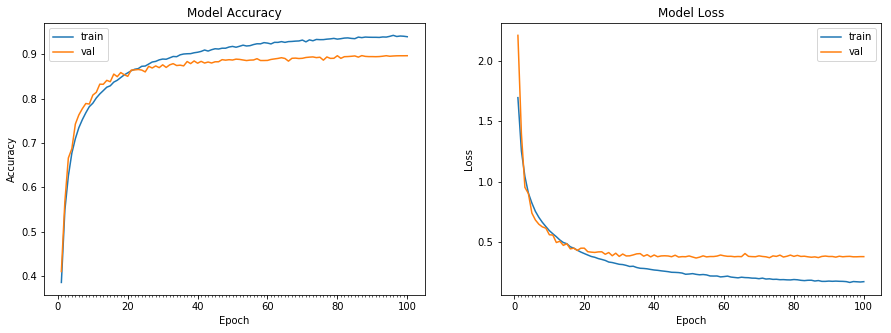

Accuracy on test data is: 89.65


In [13]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# datagen.fit(train_features)
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0075 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_after_cutout_info = model_after_cutout.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_after_cutout_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_after_cutout))

W0705 07:35:22.150627 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:22.180529 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:24.505084 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:24.530864 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:26.866060 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:26.891511 140413385160576 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0705 07:35:29.234933 140413

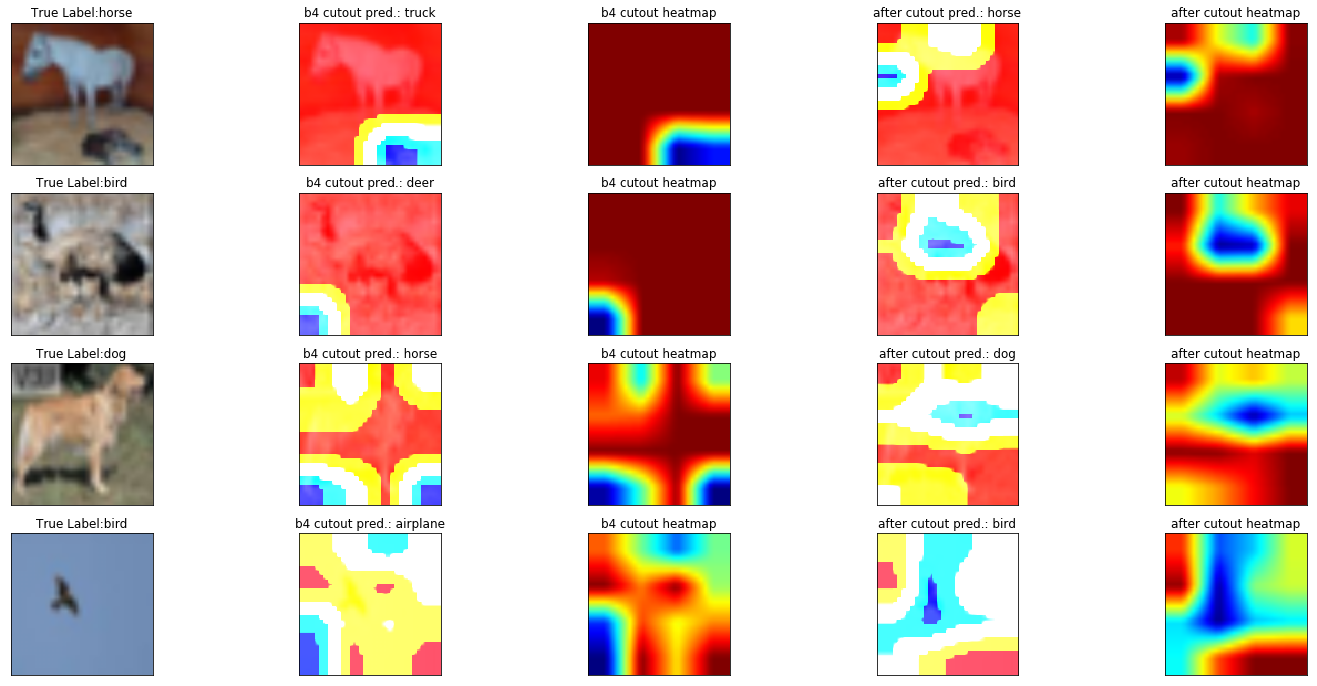

In [62]:
import random
import cv2
from keras.preprocessing import image


Y_pred_before = model_before_cutout.predict(test_features)
Y_pred_after = model_after_cutout.predict(test_features)
Y_pred_classes_before = np.argmax(Y_pred_before, axis = 1)
Y_pred_classes_after = np.argmax(Y_pred_after, axis = 1)
Y_true = np.argmax(test_labels, axis = 1)
error_before = (Y_pred_classes_before - Y_true != 0)
correct_after = (Y_pred_classes_after - Y_true == 0)
reqd = [error_before[i] and correct_after[i] for i in range(len(error_before))]
reqd = [i for i, x in enumerate(reqd) if x]
# index_list = random.sample(reqd, 4)
index_list = [4926,4732,8301,3068]
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(25,12))
for ii in range(len(index_list)):
  img = test_features[index_list[ii]]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds_before = model_before_cutout.predict(x)
  preds_after = model_after_cutout.predict(x)
  class_idx_before = np.argmax(preds_before[0])
  class_idx_after = np.argmax(preds_after[0])
  Y_true = np.argmax(test_labels[index_list[ii]]) 
  class_output_before = model_before_cutout.output[:, class_idx_before]
  class_output_after = model_after_cutout.output[:, class_idx_after]
  last_conv_layer_before = model_before_cutout.get_layer("activation_13")
  last_conv_layer_after = model_after_cutout.get_layer("activation_27")
  grads_before = K.gradients(class_output_before, last_conv_layer_before.output)[0]
  grads_after = K.gradients(class_output_after, last_conv_layer_after.output)[0]
  pooled_grads_before = K.mean(grads_before, axis=(0, 1, 2))
  pooled_grads_after = K.mean(grads_after, axis=(0, 1, 2))
  iterate_before = K.function([model_before_cutout.input], [pooled_grads_before, last_conv_layer_before.output[0]])
  iterate_after = K.function([model_after_cutout.input], [pooled_grads_after, last_conv_layer_after.output[0]])
  pooled_grads_value_before, conv_layer_output_value_before = iterate_before([x])
  pooled_grads_value_after, conv_layer_output_value_after = iterate_after([x])
  for i in range(20):
      conv_layer_output_value_before[:, :, i] *= pooled_grads_value_before[i]
      conv_layer_output_value_after[:, :, i] *= pooled_grads_value_after[i]
  heatmap_before = np.mean(conv_layer_output_value_before, axis=-1)
  heatmap_after = np.mean(conv_layer_output_value_after, axis=-1)
  heatmap_before = np.maximum(heatmap_before, 0)
  heatmap_after = np.maximum(heatmap_after, 0)
  heatmap_before /= np.max(heatmap_before)
  heatmap_after /= np.max(heatmap_after)
# print(heatmap.shape)
  heatmap_before = cv2.resize(heatmap_before, (img.shape[1], img.shape[0]))
  heatmap_after = cv2.resize(heatmap_after, (img.shape[1], img.shape[0]))
  heatmap_before = np.uint8(255 * heatmap_before)
  heatmap_after = np.uint8(255 * heatmap_after)
  heatmap_before = cv2.applyColorMap(heatmap_before, cv2.COLORMAP_JET)
  heatmap_after = cv2.applyColorMap(heatmap_after, cv2.COLORMAP_JET)
  superimposed_img_before = cv2.addWeighted(img, 0.6, heatmap_before, 0.4, 0, dtype = cv2.CV_32F)
  superimposed_img_after = cv2.addWeighted(img, 0.6, heatmap_after, 0.4, 0, dtype = cv2.CV_32F)
# plt.imshow(img)
  ax = fig.add_subplot(4,5, 1 + 5*ii, xticks=[], yticks=[])
  ax.set_title("True Label:{}".format(class_names[Y_true]))
  plt.imshow(cv2.resize(img, (128, 128)))
  ax = fig.add_subplot(4,5, 2 + 5*ii, xticks=[], yticks=[])
  ax.set_title("b4 cutout pred.: {}".format(class_names[class_idx_before]))
  plt.imshow(cv2.resize(superimposed_img_before, (128, 128)))
  ax = fig.add_subplot(4,5, 3 + 5*ii, xticks=[], yticks=[])
  ax.set_title("b4 cutout heatmap")
  plt.imshow(cv2.resize(heatmap_before, (128, 128)))
  ax = fig.add_subplot(4,5, 4 + 5*ii, xticks=[], yticks=[])
  ax.set_title("after cutout pred.: {}".format(class_names[class_idx_after]))
  plt.imshow(cv2.resize(superimposed_img_after, (128, 128)))
  ax = fig.add_subplot(4,5, 5 + 5*ii, xticks=[], yticks=[])
  ax.set_title("after cutout heatmap")
  plt.imshow(cv2.resize(heatmap_after, (128, 128)))
  cv2.waitKey(0)
# plt.show()